In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [ ]:
df = pd.read_csv('/content/data/football_data.csv')

In [ ]:
pdf = df.copy()
pdf.drop(pdf.columns[24],axis=1,inplace=True)

In [ ]:
objectlst = list(pdf.select_dtypes(include=['object']).columns)
numlst = list(pdf.select_dtypes(include=['float64']).columns)

In [ ]:
for i in objectlst:
  pdf.fillna(value=pdf[i].mode(),inplace=True)
  pdf[i] = pdf[i].apply(lambda x: str(x))
  pdf[i] = pdf[i].replace('nan',pdf[i].mode()[0])

In [ ]:
for i in numlst:
  pdf.fillna(value=pdf[i].mean(),inplace= True)
  pdf[i] = pdf[i].replace('nan',pdf[i].mean())

**Plot histograms of count of players on the basis of some attributes like height.**

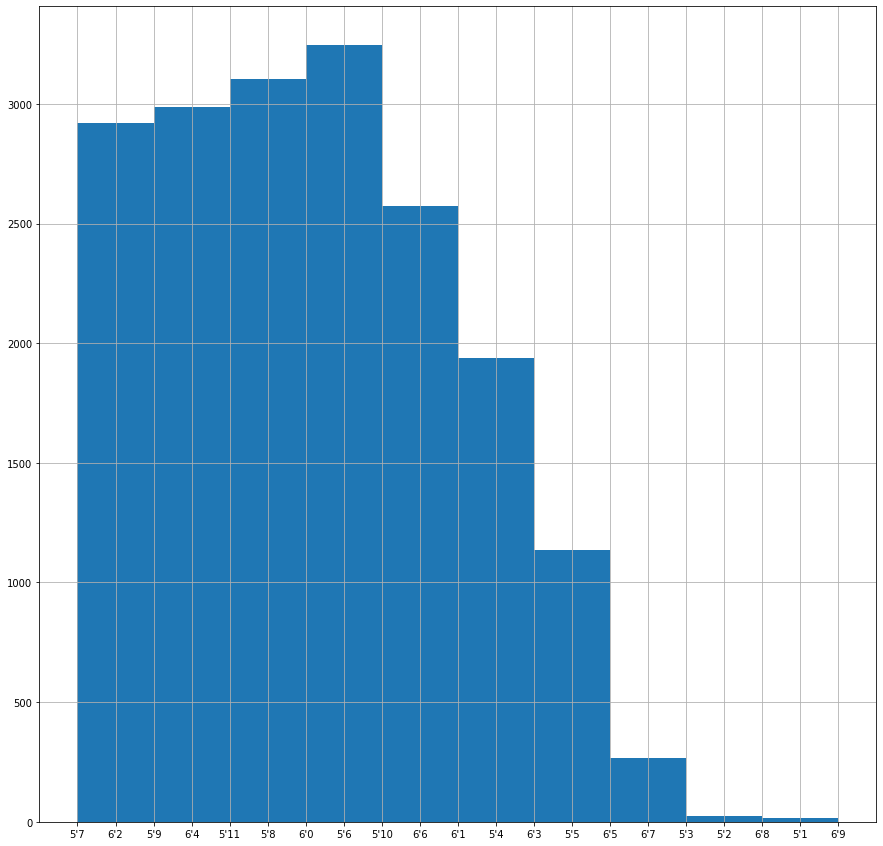

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
pdf['Height'].hist(ax=ax)

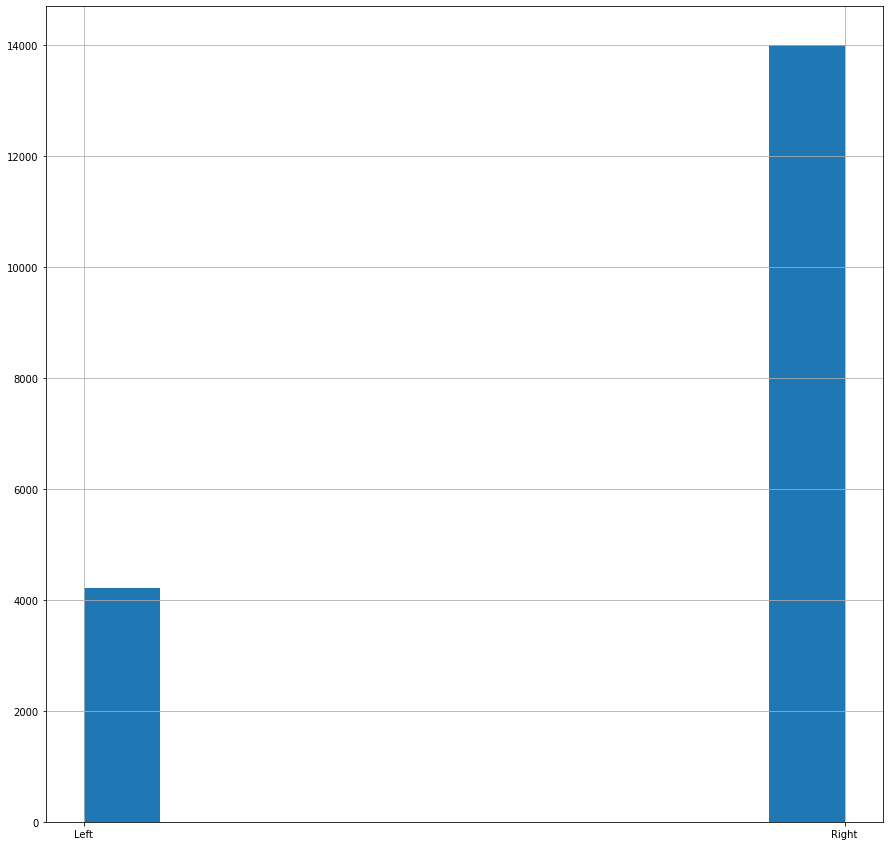

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
pdf['Preferred Foot'].hist(ax=ax)

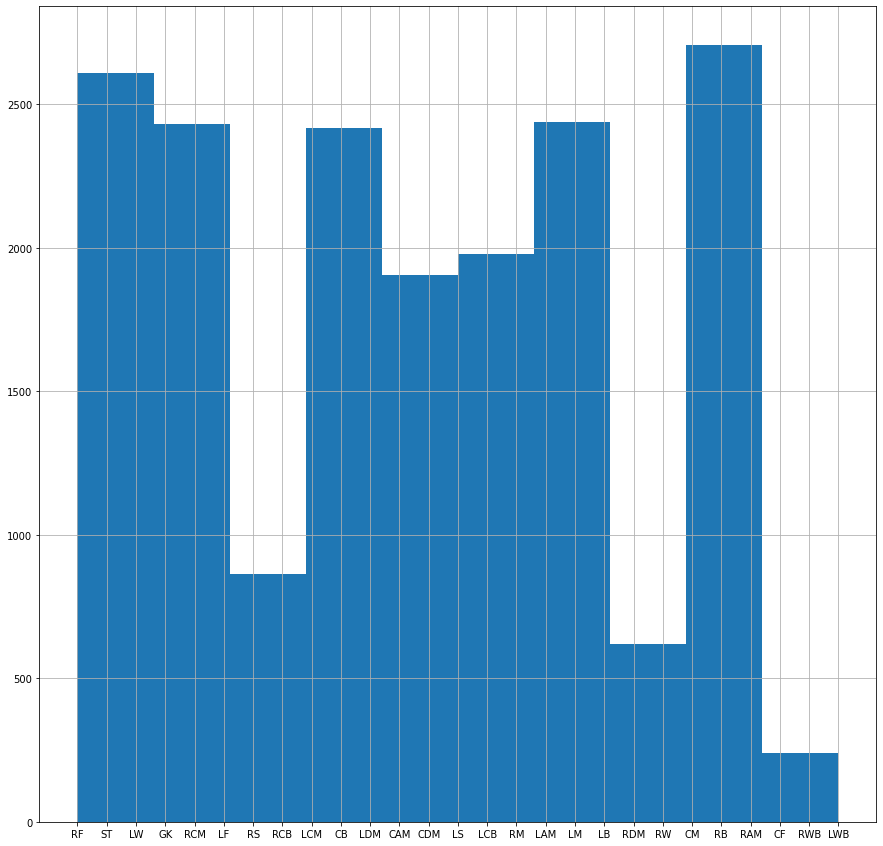

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
pdf['Position'].hist(ax=ax)

**Distribution of players in different clubs/country on the basis of some attribute.**

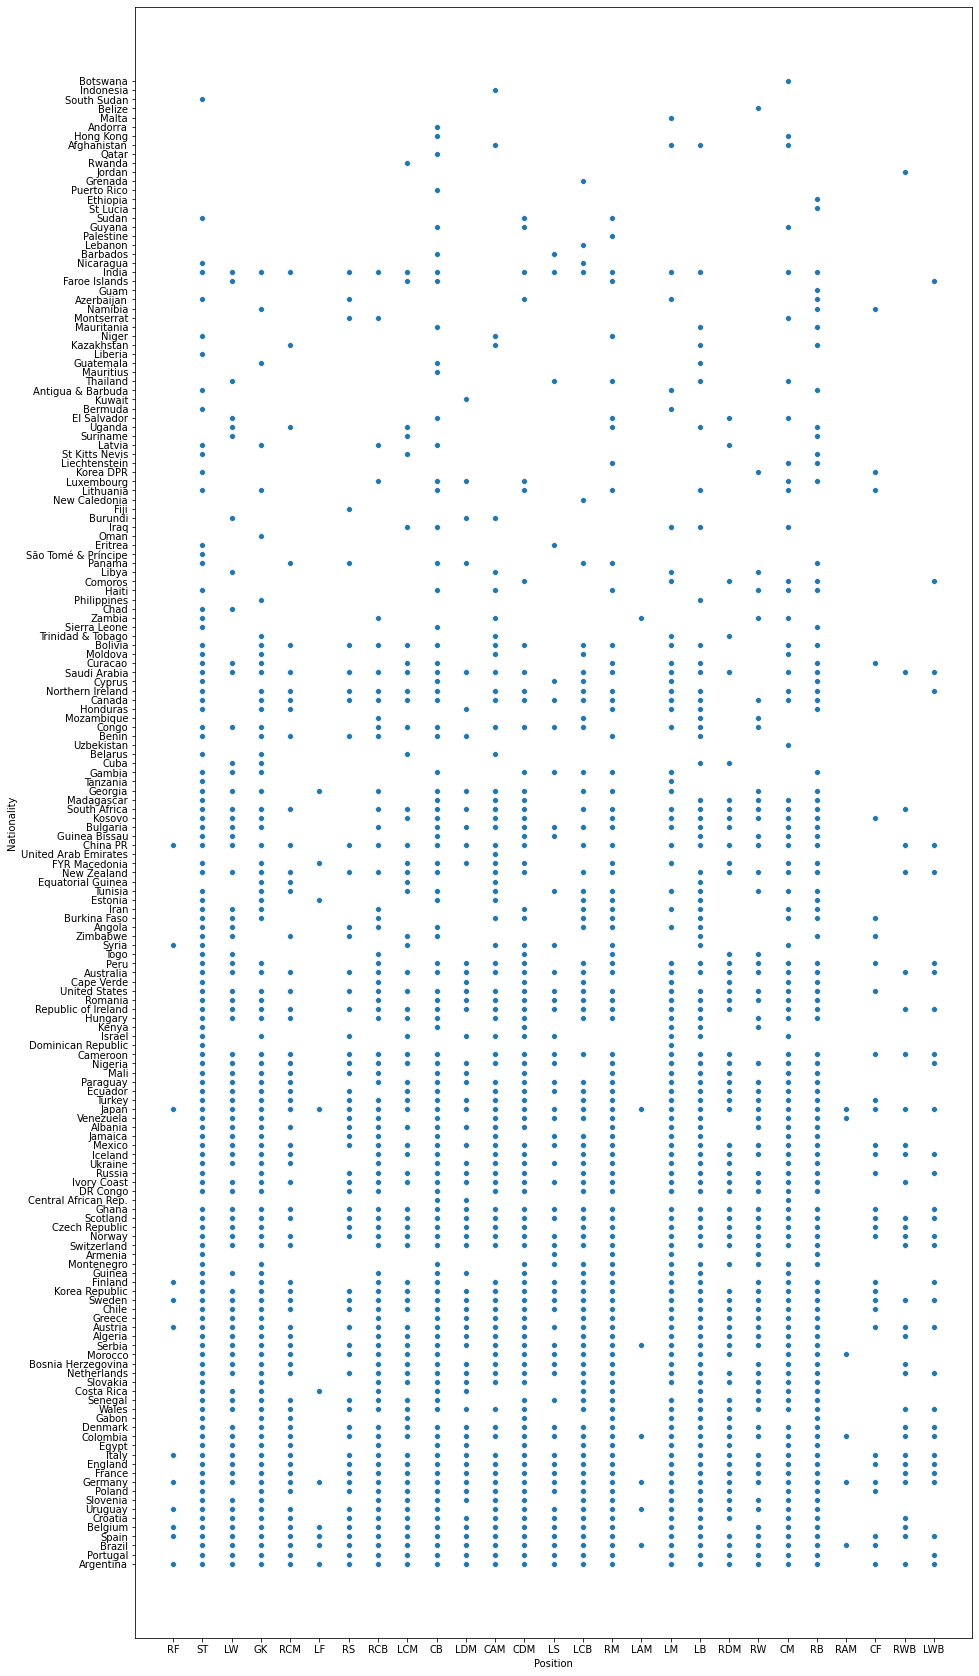

In [ ]:
fig = plt.figure(figsize = (15,30))
ax = fig.gca()
sns.scatterplot(x ='Position', y ='Nationality', data = pdf)

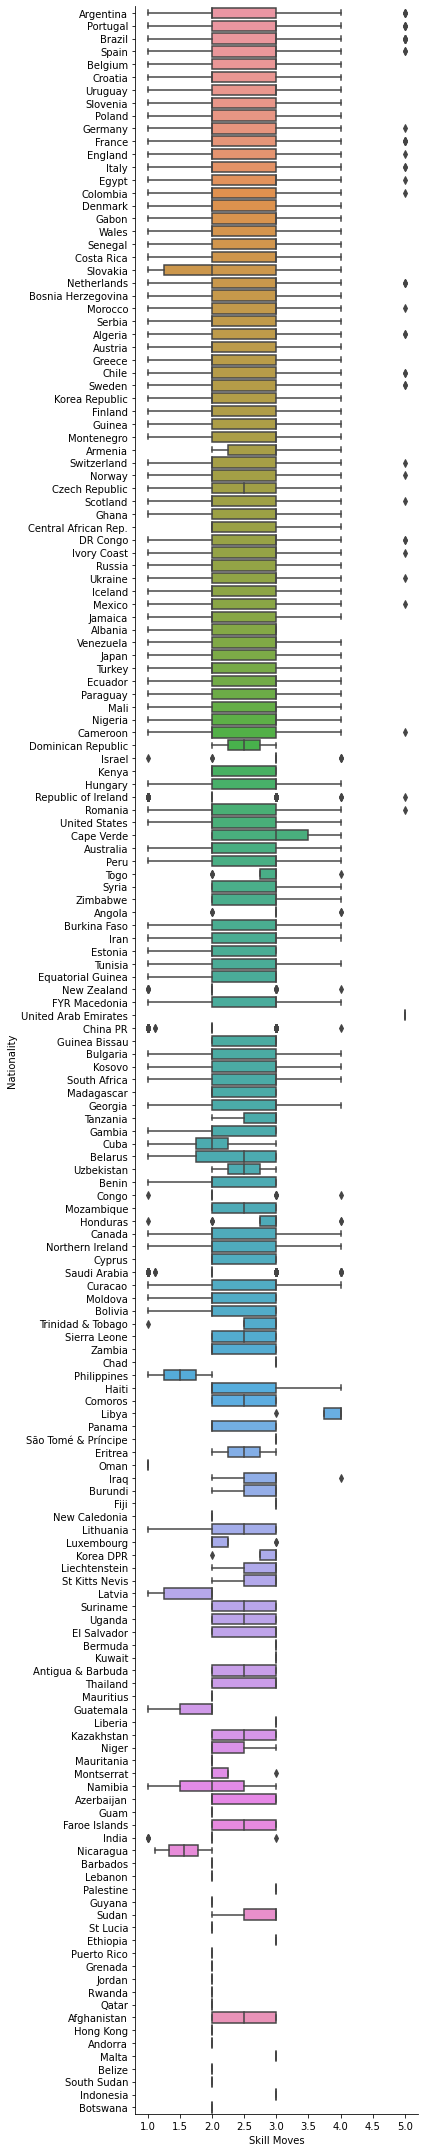

In [ ]:
sns.catplot(x ='Skill Moves', y ='Nationality',kind='box',data = pdf,height=30,aspect=0.2)

**Can you use visualisation techniques to find outliers? Like Ronaldo and Messi.**

{'boxes': [<matplotlib.lines.Line2D at 0x7fb1f5e30080>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb1f5e30a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb1f5e3d588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb1f5e3d208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb1f5e30390>,
  <matplotlib.lines.Line2D at 0x7fb1f5e30710>]}

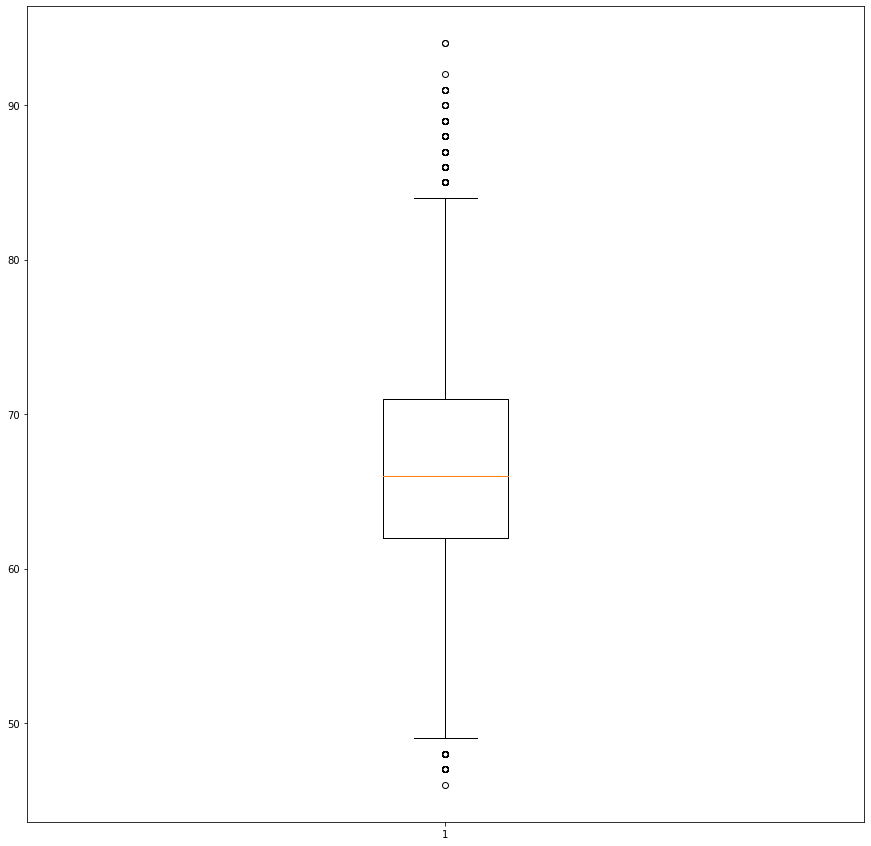

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
plt.boxplot(pdf.Overall)

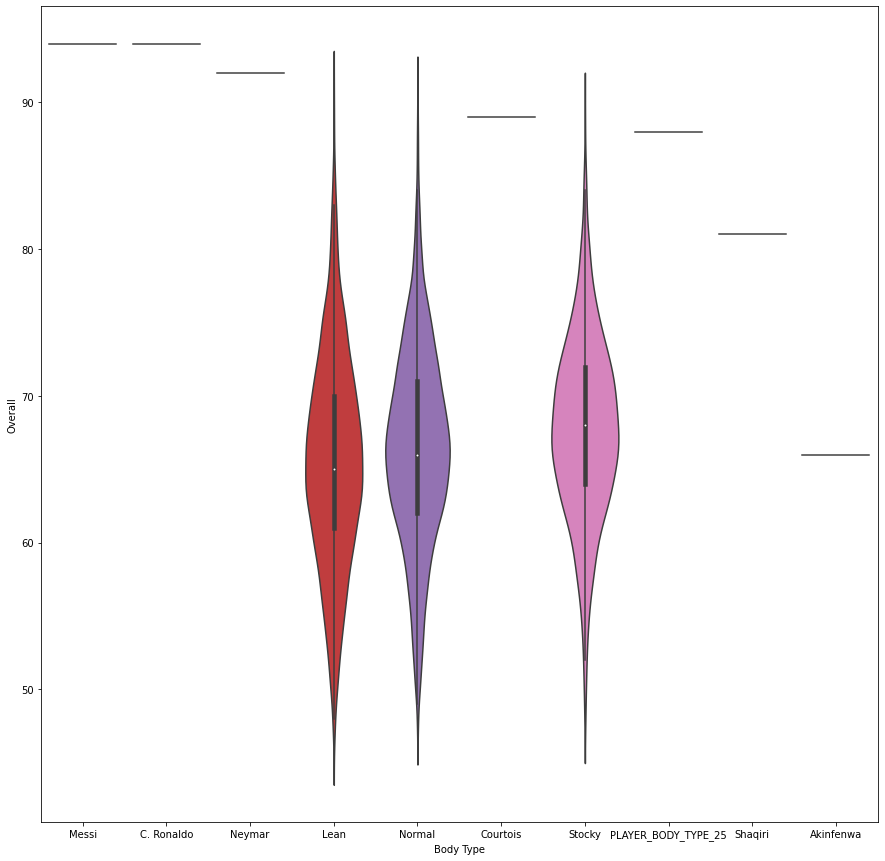

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.violinplot(y ='Overall', x ='Body Type', data = pdf)

**Features of players according to their position.**

In [ ]:
player_features = ('Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Composure', 'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


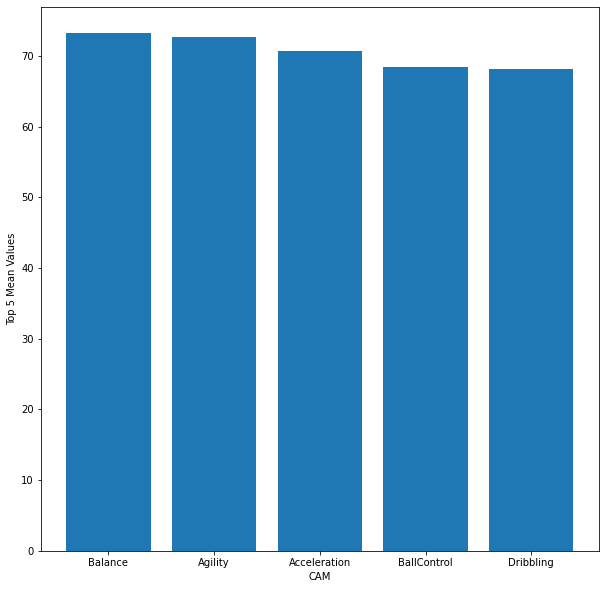

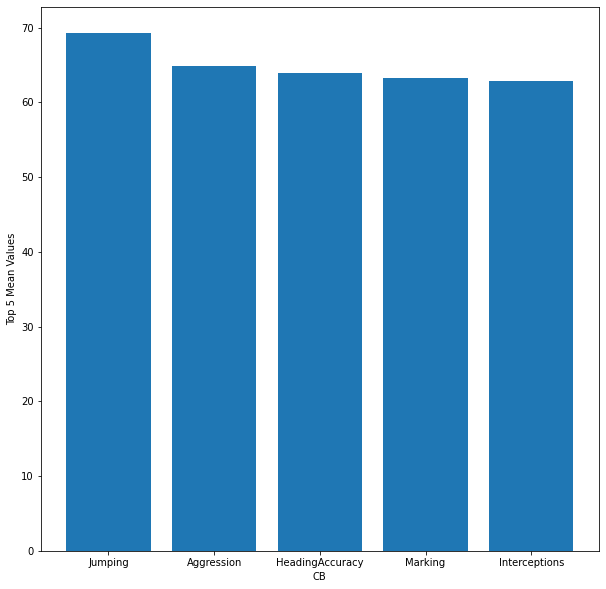

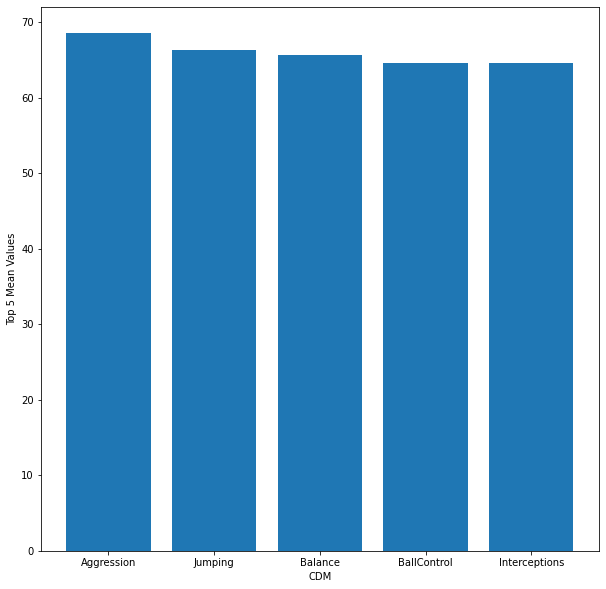

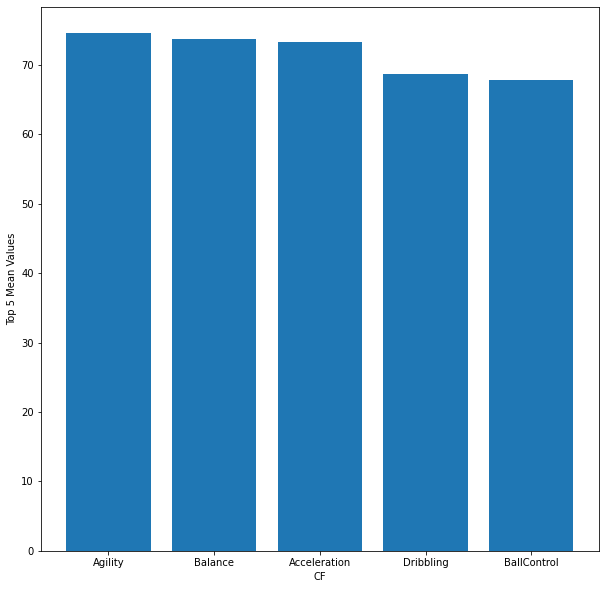

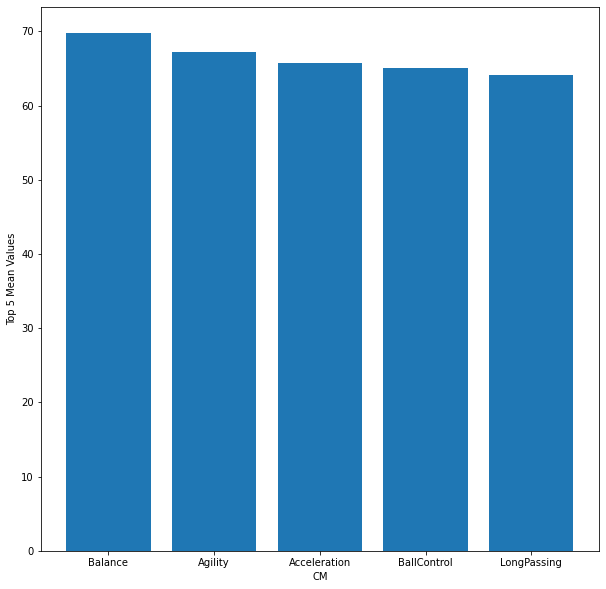

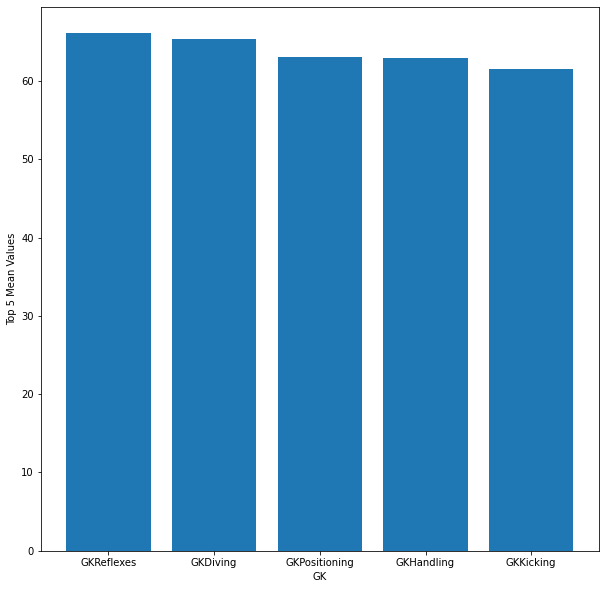

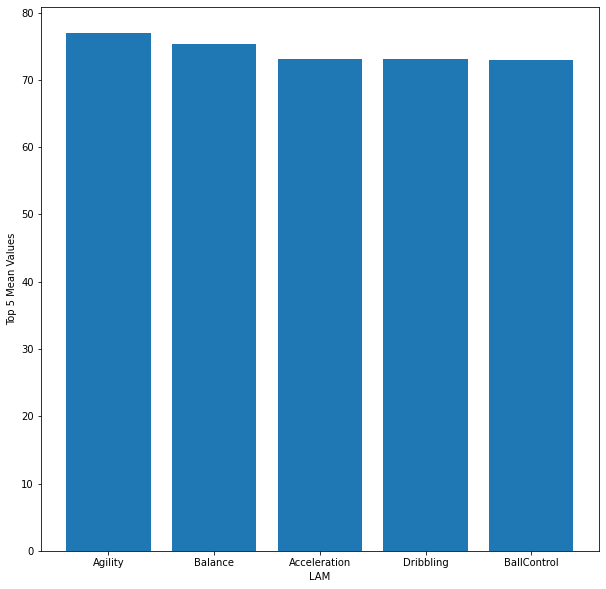

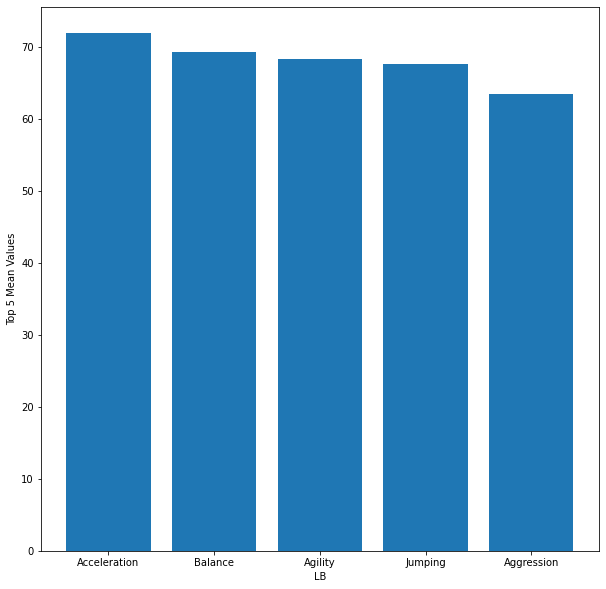

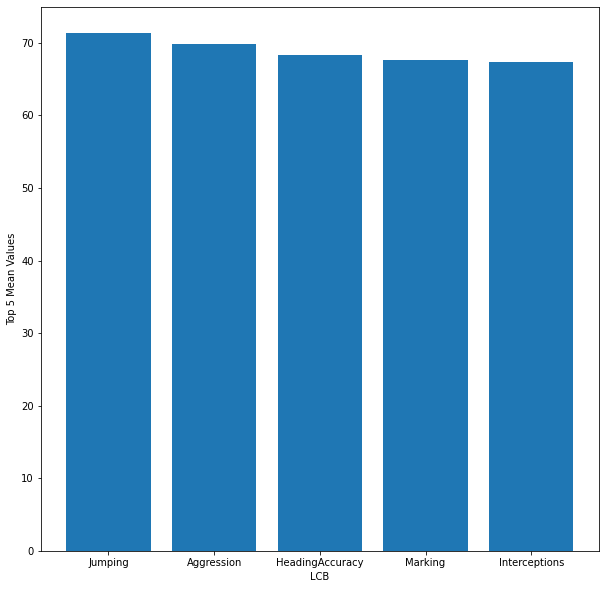

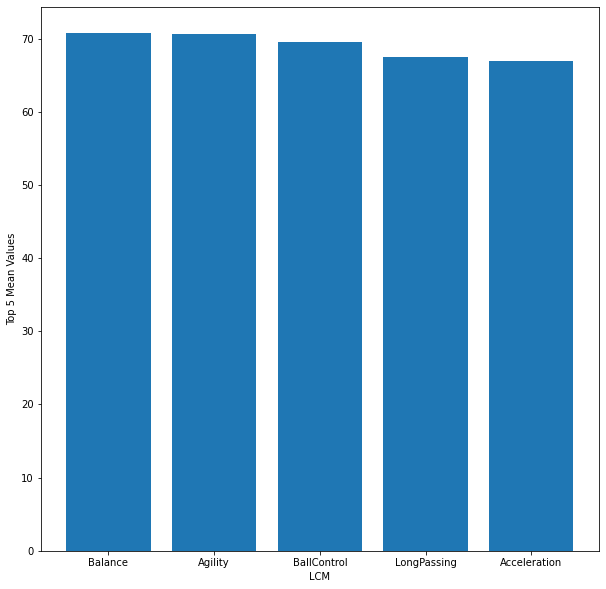

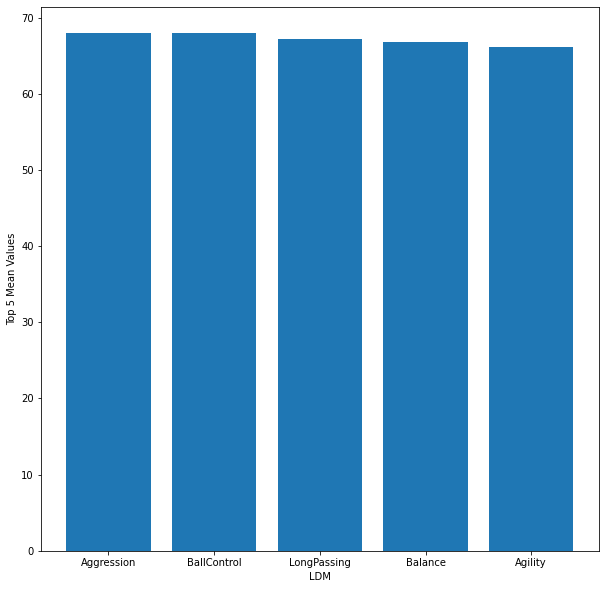

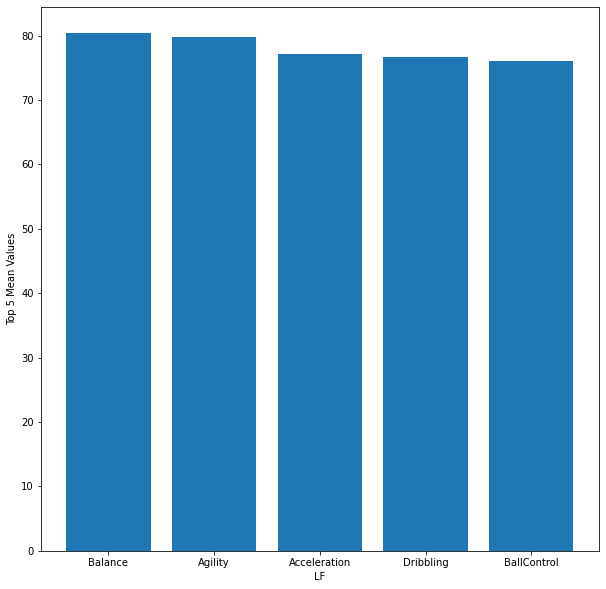

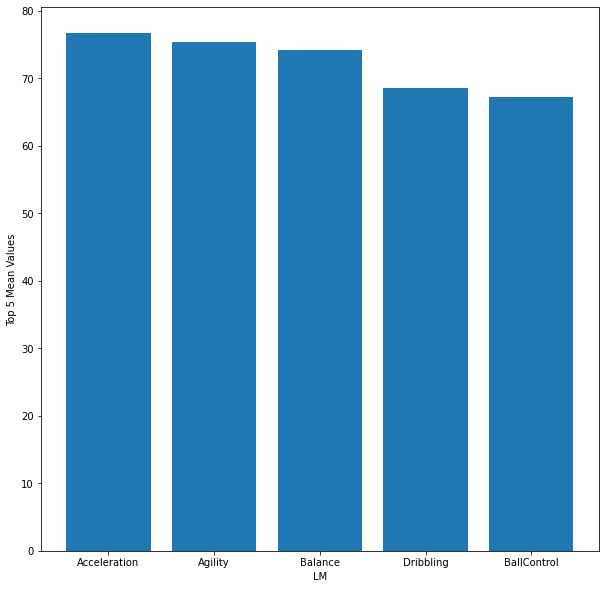

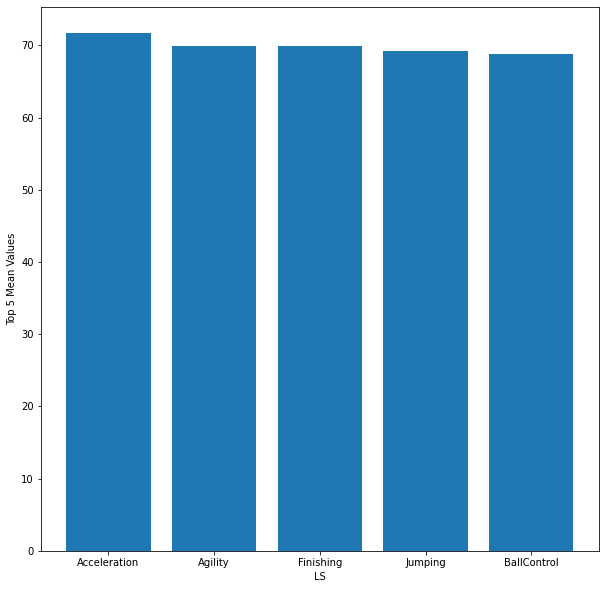

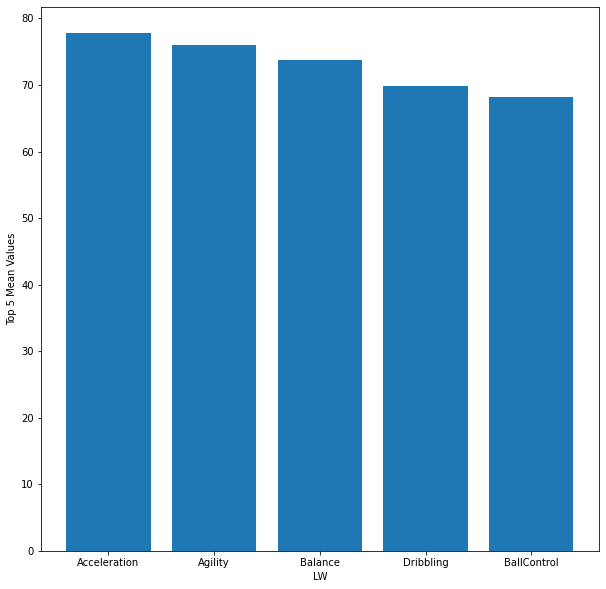

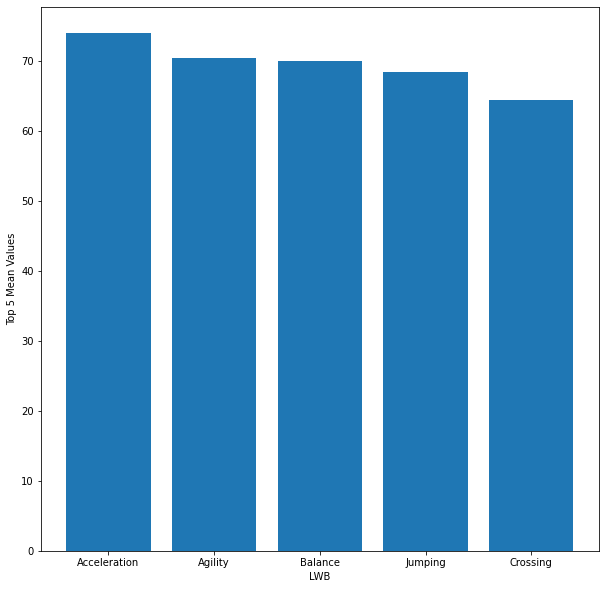

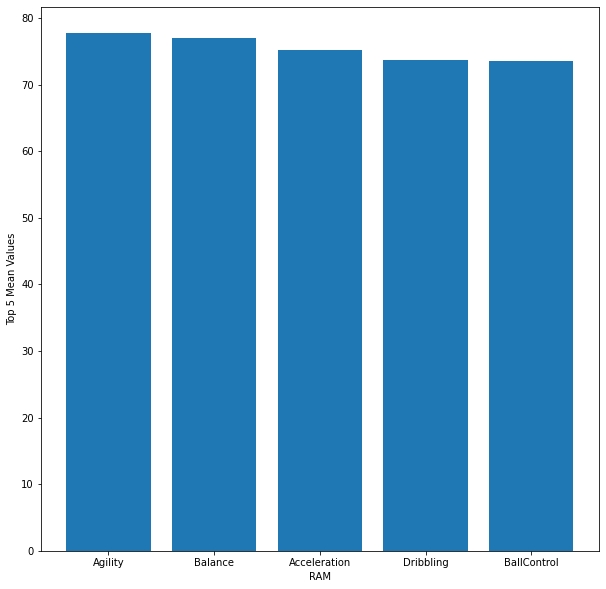

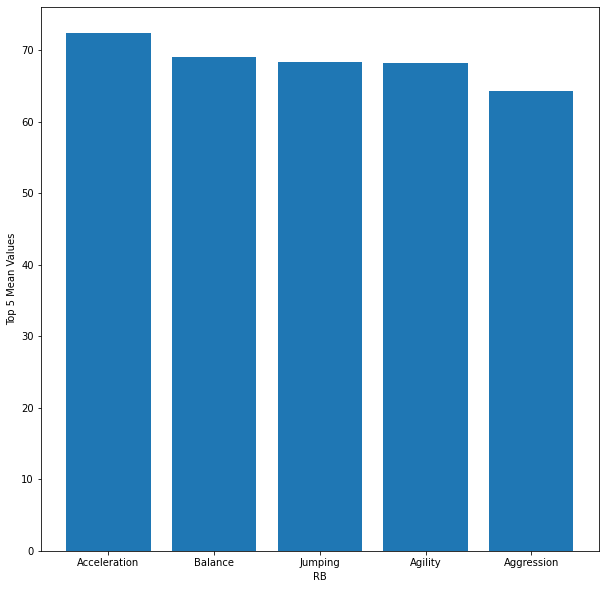

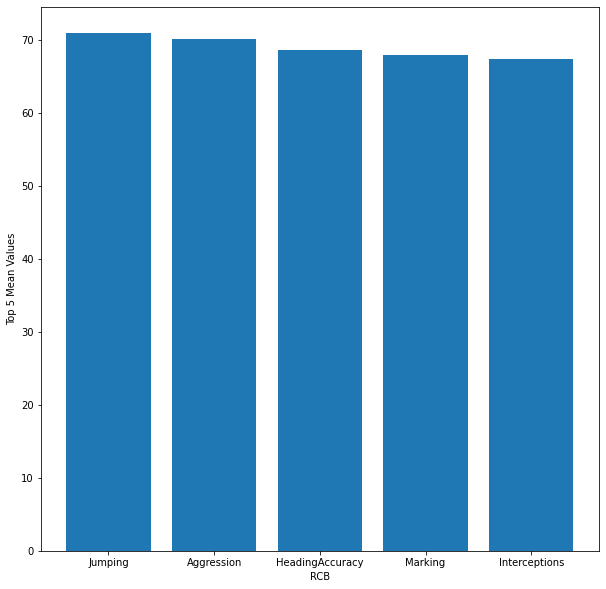

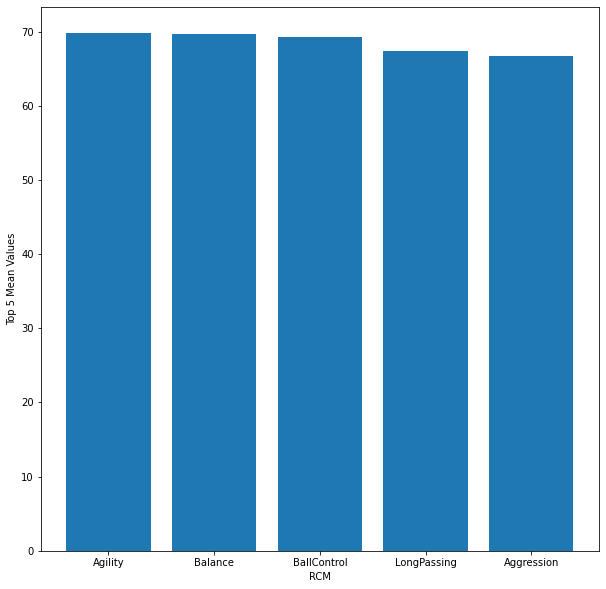

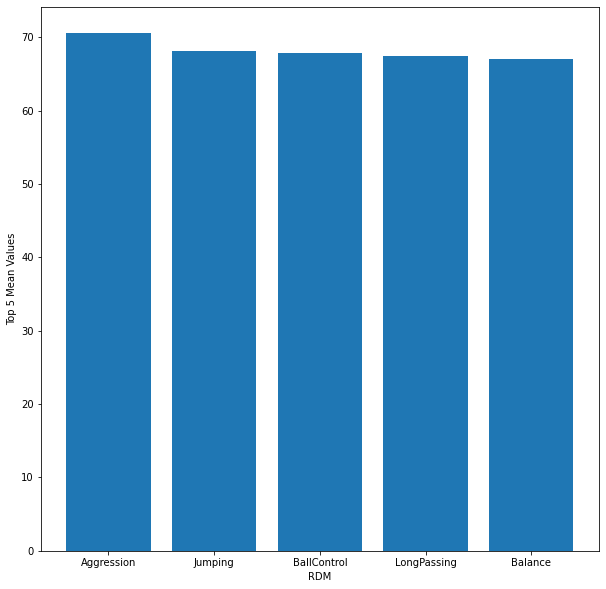

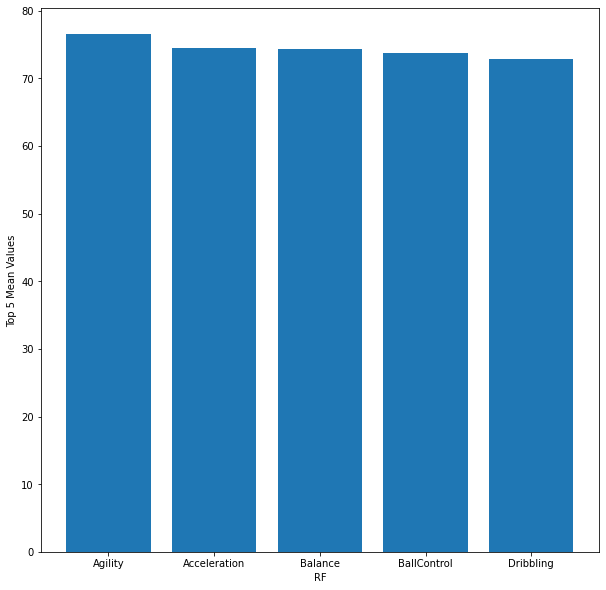

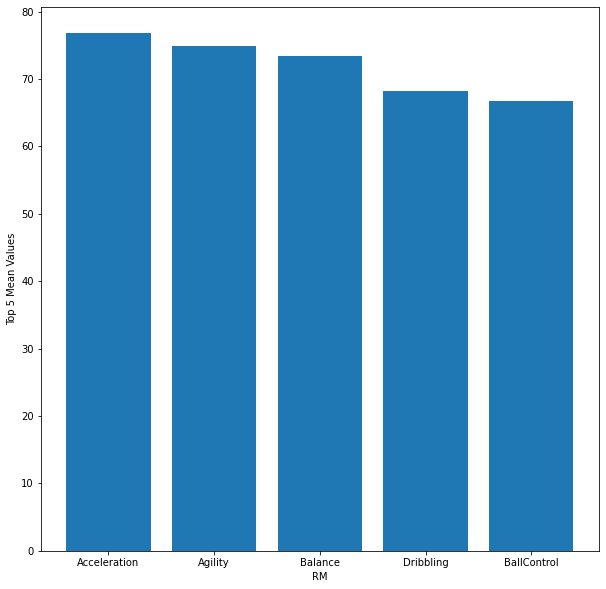

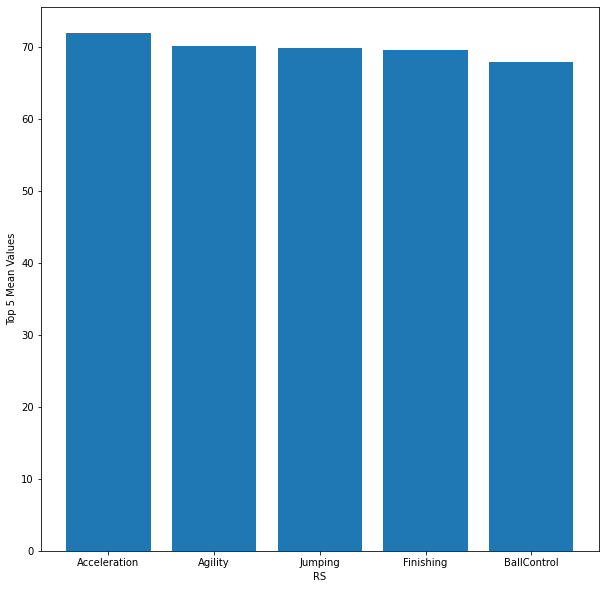

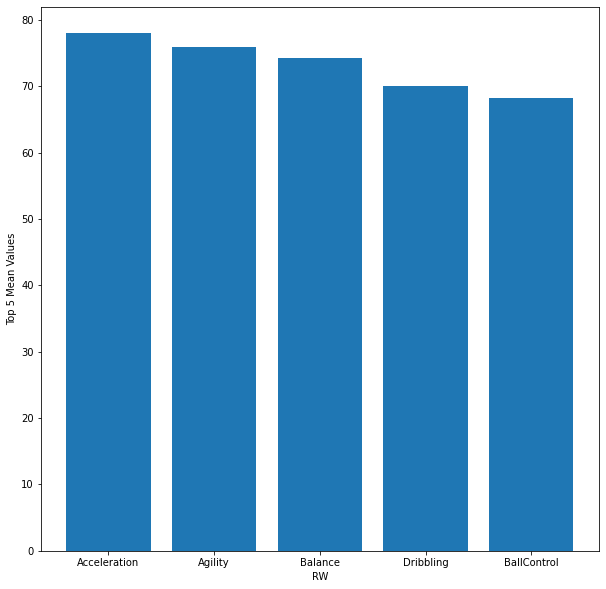

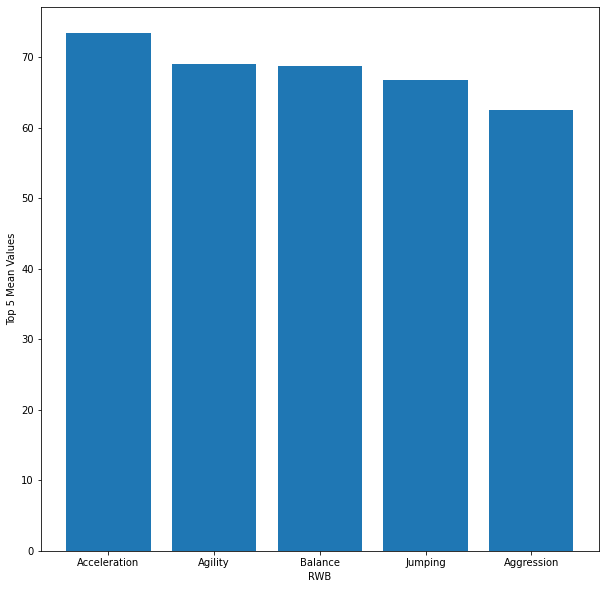

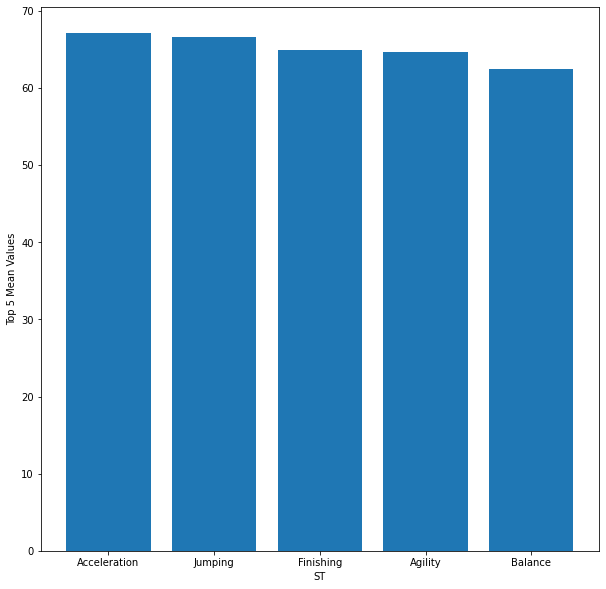

In [ ]:
for i,j in pdf.groupby(pdf['Position'])[player_features].mean().iterrows():
  top_features = dict(j.nlargest(5))
  plt.figure(figsize=(10,10))
  plt.bar(range(len(top_features)), list(top_features.values()), align='center')
  plt.xticks(range(len(top_features)), list(top_features.keys()))
  plt.xlabel(i)
  plt.ylabel('Top 5 Mean Values')